In [2]:
import numpy as np
from numpy import linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

The following is the system of ODEs that we will use:
<br>
$\frac{dS}{Dt} = -\frac{S}{N}[\beta_pI_p + \beta_aI_a + \beta_sI_s]$
<br>
$\frac{dE}{Dt} = \frac{S}{N}[\beta_pI_p + \beta_aI_a + \beta_sI_s] - \frac{1}{\tau_E}$
<br>
$\frac{dI_p}{dt} = \frac{1}{\tau_E}E - \frac{1}{\tau_P}I_p$
<br>
$\frac{dI_a}{dt} = \frac{f}{\tau_P}I_p - \frac{1}{\tau_I}I_a$
<br>
$\frac{dI_s}{dt} = \frac{1 - f}{\tau_P}I_p - \frac{1 - d}{\tau_I}I_s - \frac{d}{\tau_D}I_s$
<br>
$\frac{dR}{dt} = \frac{1}{\tau_I}I_a + \frac{1 - d}{\tau_I}I_s$

Where: 
<br>
$S$: Susceptible Population
<br>
$N$: Total Population
<br>
$E$: Exposed Population
<br>
$I_p$: Infected Population (pre-symptomatic)
<br>
$I_a$: Infected Population (asymptomatic)
<br>
$I_s$: Infected Population (symptomatic)
<br>
$R$: Recovered Population
<br><br>
$\beta_p$: Infection Rate (pre-symptomatic)
<br>
$\beta_a$: Infection Rate (asymptomatic)
<br>
$\beta_s$: Infection Rate (symptomatic)
<br><br>
$\tau_E$: Length of time exposed
<br>
$\tau_P$: Length of time pre-infectious
<br>
$\tau_I$: Length of time infectious
<br>
$\tau_D$: Length of time while patient is dying (...can't think of a less morbid way to describe...)
<br><br>
$f$: Proportion of infected people who are asymptomatic
<br>
$d$: Proportion of infected people who die

Estimate values for parameters as below;

In [15]:
betaP = 0.8
betaA = 0.8
betaS = 0.8
tauE = 3.5
tauP = 1.5
tauI = 3.5
tauD = 14
f = 0.3
d = 0.05
N = 4.9*10**6

In [16]:
V = np.array([[1/tauE,0,0,0],[-1/tauE,1/tauP,0,0],[0,-f/tauP,1/tauI,0],[0,-(1-f)/tauP,0,(1-d)/tauI + d/tauD]])

In [17]:
F = np.array([[0,betaP,betaA,betaA],[0,0,0,0],[0,0,0,0],[0,0,0,0]])

NOTE: Each cell in $F$ is an appearance of a new infection and each value in $V$ is transmission from one infected class($E,I_p.I_a.I_s$) to another.
<br>
$G$ is the next generational matrix 

In [18]:
G = np.matmul(F, la.inv(V))

Basic Reproductive Rate: $R_0$ is the dominant eigenvalue of $G = FV^-1$

In [19]:
R_0 = np.max(la.eig(G)[:1])

In [20]:
R_0

4.076363636363636

Basic Reproductive Rate with given parameters is 4.0763

With the same parameters, our model looks like this over the first 70 days:
<br>
Note: this is an estimate for the case where no restrictions were implemented 

In [21]:
def SEIR(y, t, betaP, betaA, betaS, tauE, tauP, tauI, tauD, f, d, N):
    S, E, Ip, Ia, Is, R = y
    dydt = [-(S/N)*(betaP*Ip + betaA*Ia + betaS*Is), (S/N)*(betaP*Ip + betaA*Ia + betaS*Is) - (1/tauE)*E, (1/tauE)*E - (1/tauP)*Ip, (f/tauP)*Ip - (1/tauI)*Ia, ((1-f)/tauP)*Ip - ((1-d)/tauI)*Is - (d/tauD)*Is, (1/tauI)*Ia + ((1-d)/tauI)*Is]
    return dydt

In [22]:
y0 = [4.9*10**6, 1, 0, 0, 0, 0]

In [23]:
t = np.linspace(0, 70, 71)

In [24]:
sol = odeint(SEIR, y0, t, args = (betaP, betaA, betaS, tauE, tauP, tauI, tauD, f, d, N))

In [25]:
S = sol[:,0]
E = sol[:,1]
Ip = sol[:,2]
Ia = sol[:,3]
Is = sol[:,4]
R = sol[:,5]

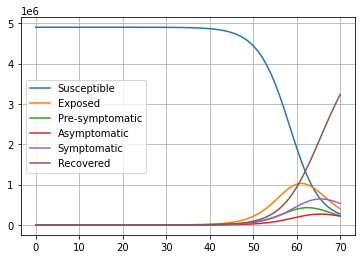

In [26]:
plt.plot(t, S, label = 'Susceptible')
plt.plot(t, E, label = 'Exposed')
plt.plot(t, Ip, label = 'Pre-symptomatic')
plt.plot(t, Ia, label = 'Asymptomatic')
plt.plot(t, Is, label = 'Symptomatic')
plt.plot(t, R, label = 'Recovered')
plt.legend()
plt.grid()
plt.show()

Compare with actual data assuming that just symptomatic cases are tested and that all symptomatic cases are tested
<br>
Also, offset time by 7 days to allow for time for symptomatic patient to show symptoms

In [27]:
CaseData = pd.read_excel(r'C:\Users\barry\Downloads\case_data_ireland.xlsx')
data = CaseData.to_numpy()

In [28]:
toffset = 7 

In [29]:
tstart = 1 - toffset
tfinal = 70 - toffset

In [32]:
t = np.linspace(tstart,tfinal,71)

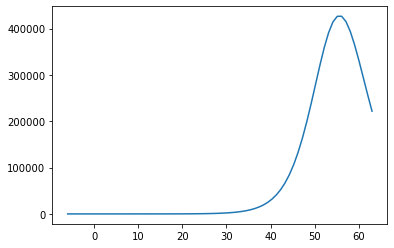

In [35]:
plt.plot(t,Ip)